# Extract Liver Images and Save to Folder

In [1]:
import pandas as pd
import zipfile
import glob
import os
import SimpleITK as sitk
import numpy as np
import cv2
import matplotlib.pyplot as plt

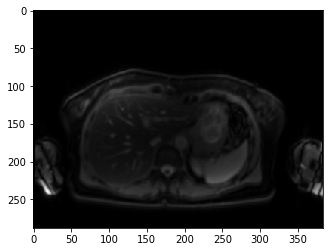

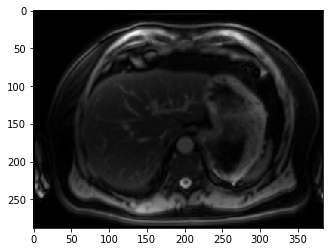

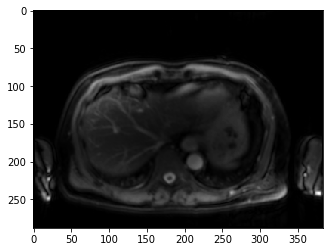

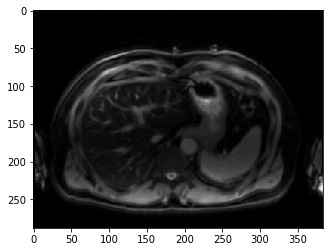

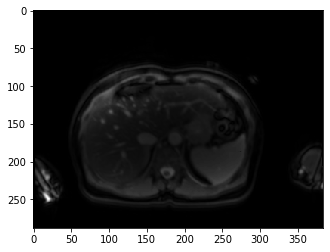

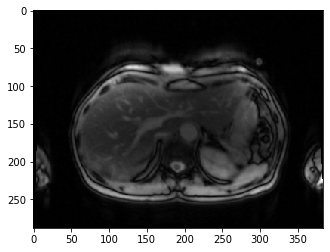

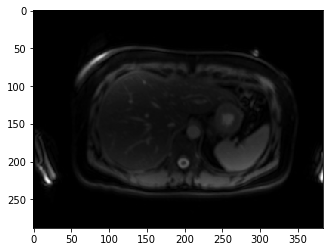

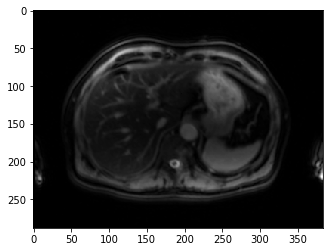

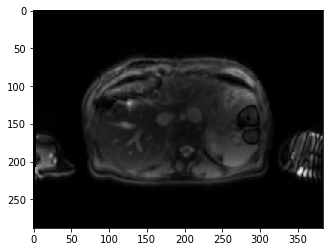

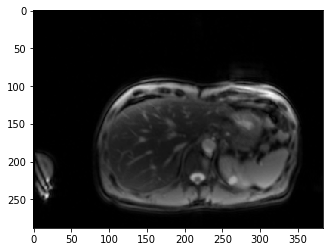

In [2]:
# extract dicom liver images from each .zip file and save with EID in filename

for zipfile_path in glob.glob("/scratch/groups/mrivas/ukbb24983/phenotypedata/2005693/41413/bulk/ukb2005693.41413.20204/*.zip")[:10]:

    dir_path = '/scratch/groups/mrivas/ukbb24983/phenotypedata/2005693/41413/bulk/ukb2005693.41413.20204/liver_images/'
    
    zip_file = zipfile.ZipFile(zipfile_path)  
    zip_name = zipfile_path.split('/')[-1]
    EID = zip_name.split('_')[0]

    folder_path = dir_path+EID
    
    #if not os.path.exists(folder_path):
        #os.makedirs(folder_path)
    zip_file.extractall(path=folder_path)

    reader = sitk.ImageSeriesReader()
    dicom_names = reader.GetGDCMSeriesFileNames(folder_path)
    reader.SetFileNames(dicom_names)
    image = reader.Execute()
    imagearr = np.squeeze(sitk.GetArrayFromImage(image)[1,:,:])
    
    plt.imshow(imagearr, interpolation='nearest', cmap='gray')
    plt.show() 
    
    save_path = dir_path+'all_patients/'+EID+'.npy'
    np.save(save_path, imagearr)

    
    
    #writer = sitk.ImageFileWriter()
    #writer.SetFileName(dir_path+'all_patients/'+EID+'.dcm')
    #writer.Execute(image[:, :, 0])

## Older Code

In [1]:
# to inspect dicom images, select a dicom filename in the folder

import pydicom
ds = pydicom.dcmread('/scratch/groups/mrivas/ukbb24983/phenotypedata/2005693/41413/bulk/ukb2005693.41413.20204/temp_for_zip_extract/89JV4SSQ.dcm')

ds.data_element

<bound method Dataset.data_element of Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 212
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.2.18.41754.2018092318573471208109384
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMBP_360'
(0002, 0016) Source Application Entity Title     AE: 'MRC41754'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'DIS2D']
(0008, 0012) Instance Creation Date              DA: '20180923'
(0008, 0013) Instance Creation Time             

In [ ]:
# extract dicom liver images from each .zip file and save with patient ID

for zipfile_path in glob.glob("/scratch/groups/mrivas/ukbb24983/phenotypedata/2005693/41413/bulk/ukb2005693.41413.20204/*.zip"):

    zip_file = zipfile.ZipFile(zipfile_path)
    
    zip_name = zipfile_path.split('/')[-1]
    EID = zip_name.split('_')[0]
    
    try:
        if 'manifest.csv' in zip_file.namelist():
            df = pd.read_csv(zip_file.open('manifest.csv'), index_col = False)
            patient_id = df['patientid'][0].replace(" ", "")
        elif 'manifest.cvs' in zip_file.namelist():
            df = pd.read_csv(zip_file.open('manifest.cvs'), index_col = False)
            patient_id = df['patientid'][0]
        dicom_name = df['filename'][0]
        print(df['filename'])
        print(zipfile_path)
        print(dicom_name)
        
        # save to folder as patient_id.dcm
        zipinfos = zip_file.infolist()
        for zipinfo in zipinfos:
            if zipinfo.filename == dicom_name:
                zipinfo.filename = EID+'.dcm'
                zip_file.extract(dicom_name, path='/scratch/groups/mrivas/ukbb24983/phenotypedata/2005693/41413/bulk/ukb2005693.41413.20204/vae_test_images')
        
        current_path = '/scratch/groups/mrivas/ukbb24983/phenotypedata/2005693/41413/bulk/ukb2005693.41413.20204/vae_test_images/'+EID+'.dcm'

        # visualize full image
        full_image = cv2.resize(imagearr[0,:,:], (128, 128)) / 255.0 
        plt.imshow(full_image, interpolation='nearest', cmap='gray')
        plt.show()
    except:
        continue